# U4_ALGORITMO GENETICO

In [1]:
import numpy
import functools
import operator
import imageio
import numpy
import matplotlib.pyplot
import pygad

In [2]:
#IMPORT IMAGE
targ = imageio.v2.imread('luffy.jpg')
targ = numpy.asarray(targ/255, dtype=float)

target image
<img src="luffy.jpg"  width="200" height="200">

In [3]:
#GARI MODULE
def img2chromosome(img_arr):
    return numpy.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("A vector of length {vector_length} into an array of shape {shape}.".format(vector_length=len(vector), shape=shape))

    return numpy.reshape(a=vector, newshape=shape)

In [4]:
#FITNESS MODULE
target_chromosome = img2chromosome(targ)

def fitness_fun(solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness

In [7]:
#INSTANCE PYGAD
ga_instance = pygad.GA(num_generations=20,
                       num_parents_mating=10,    #MATING POOL SIZE
                       fitness_func=fitness_fun,
                       sol_per_pop=20,           #POPULATION SIZE
                       num_genes=targ.size,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       mutation_percent_genes=0.01,
                       mutation_type="random",
                       mutation_by_replacement=True,
                       random_mutation_min_val=0.0,
                       random_mutation_max_val=1.0)

In [8]:
ga_instance.run()

C:\Users\verde\anaconda3\lib\site-packages\pygad\pygad.py:3591: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


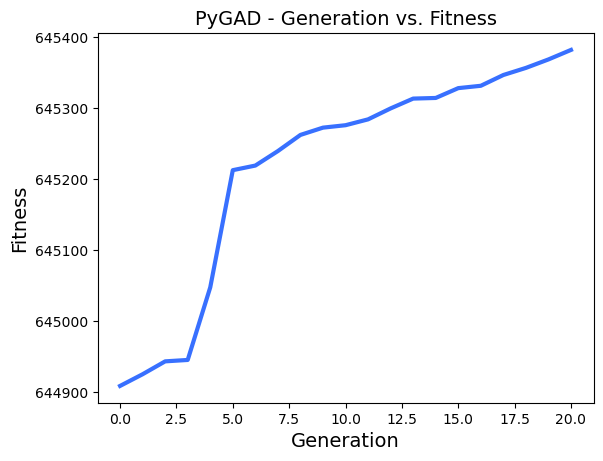

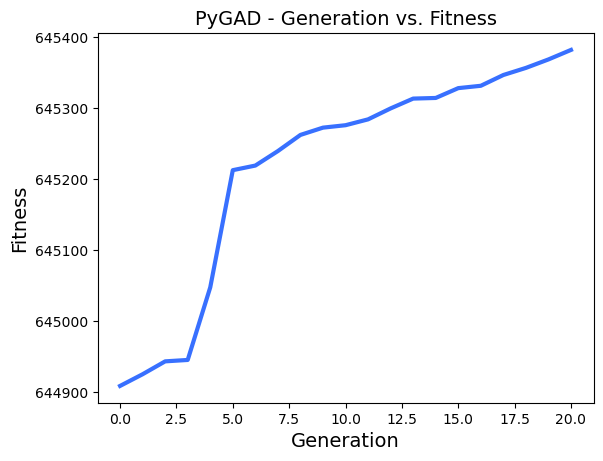

In [9]:
ga_instance.plot_result()

Fitness value of the best solution = 645382.3394119458
Index of the best solution : 1
Best fitness value reached after 20 generations.


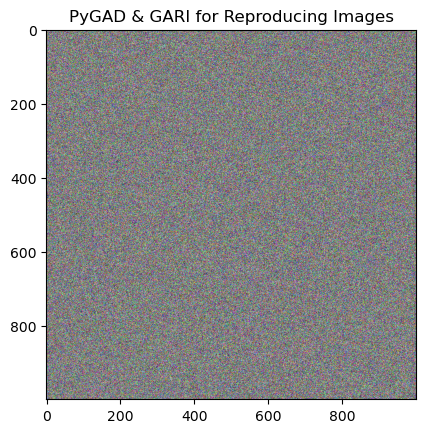

In [12]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = chromosome2img(solution, targ.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()